# Data Preparation

In [ ]:
from sklearn.datasets import make_circles

In [ ]:
n_samples = 1000

X, y = make_circles(n_samples, noise = 0.03, random_state= 42)

In [ ]:
print(f'First 5 rows of X features:\n {X[:5]}')
print(f'First 5 rows of y labels:\n {y[:5]}')

First 5 rows of X features:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 rows of y labels:
 [1 1 1 1 0]


In [ ]:
import pandas as pd

In [ ]:
circles = pd.DataFrame({
    "X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})

In [ ]:
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [ ]:
circles.label.value_counts()

,count
label,
1,500
0,500


In [ ]:
import matplotlib.pyplot as plt

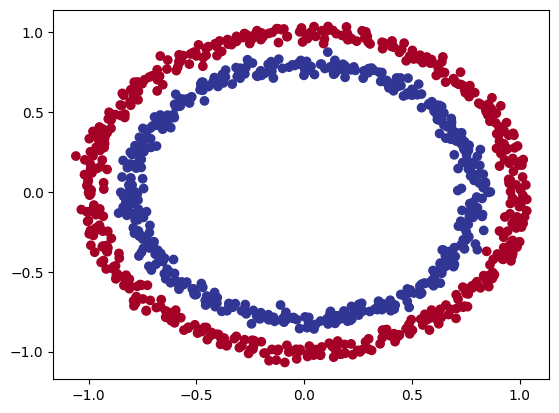

In [ ]:
plt.scatter(
    x = X[:,0],
    y = X[:,1],
    c = y,
    cmap = plt.cm.RdYlBu
);

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


In [ ]:
import torch

In [ ]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [ ]:
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

# Building a model

In [ ]:
import torch
from torch import nn

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
device

'cpu'

In [ ]:
class CircleModelV0(nn.Module):

    def __init__(self):
        super().__init__()

        self.hidden_layer = nn.Linear(in_features = 2, out_features = 5)
        self.out_layer = nn.Linear(in_features = 5, out_features = 1)

    def forward(self, x):
        return self.out_layer(self.hidden_layer(x))

In [ ]:
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (hidden_layer): Linear(in_features=2, out_features=5, bias=True)
  (out_layer): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0_seq = nn.Sequential(
    nn.Linear(in_features = 2, out_features = 5),
    nn.Linear(in_features = 5, out_features = 1)
).to(device)

In [ ]:
model_0_seq

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
untrained_preds = model_0_seq(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test sample: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test sample: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[0.7378],
        [0.5779],
        [0.8016],
        [0.7212],
        [0.2374],
        [0.1441],
        [0.1410],
        [0.0379],
        [0.8253],
        [0.5609]], grad_fn=<SliceBackward0>)

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [ ]:
untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test sample: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test sample: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[-0.0477],
        [ 0.1137],
        [-0.4259],
        [ 0.0593],
        [-0.3548],
        [-0.2569],
        [ 0.1411],
        [ 0.0545],
        [-0.4283],
        [ 0.1253]], grad_fn=<SliceBackward0>)

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### Setup Loss and Optimizer

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(
    params = model_0.parameters(),
    lr = 0.1
)

In [ ]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = correct/len(y_pred)
    return acc * 100

# Train Model

In [ ]:
y_logits = model_0(X_test.to(device))[:5]

y_logits

tensor([[-0.0477],
        [ 0.1137],
        [-0.4259],
        [ 0.0593],
        [-0.3548]], grad_fn=<SliceBackward0>)

In [ ]:
y_pred_prob = torch.sigmoid(y_logits)

y_pred_prob

tensor([[0.4881],
        [0.5284],
        [0.3951],
        [0.5148],
        [0.4122]], grad_fn=<SigmoidBackward0>)

In [ ]:
y_preds = torch.round(y_pred_prob)
y_preds

tensor([[0.],
        [1.],
        [0.],
        [1.],
        [0.]], grad_fn=<RoundBackward0>)

In [ ]:
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))
y_pred_labels

tensor([[0.],
        [1.],
        [0.],
        [1.],
        [0.]], grad_fn=<RoundBackward0>)

In [ ]:
torch.eq(y_preds.squeeze(), y_pred_labels.squeeze())

tensor([True, True, True, True, True])

In [ ]:
y_preds.squeeze()

tensor([0., 1., 0., 1., 0.], grad_fn=<SqueezeBackward0>)

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

### Building a training and testing loop

In [ ]:
torch.manual_seed(42)

epochs = 100

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### Train ###
    model_0.train()

    # forward pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # calculate loss/accuracy
    train_loss = loss_fn(y_logits, y_train)

    train_acc = accuracy_fn(y_true = y_train,
                 y_pred = y_pred)

    optimizer.zero_grad()

    train_loss.backward()

    optimizer.step()

    ### Evaluate ###
    model_0.eval()

    with torch.inference_mode():
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits, y_test)

        test_acc = accuracy_fn(y_true = y_test,
                               y_pred = test_pred)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Train Loss: {train_loss:0.5f} | Train Acc: {train_acc:0.2f}% | Test Loss: {test_loss:0.5f} | Test Acc: {test_acc:0.2f}%")

Epoch: 0 | Train Loss: 0.70277 | Train Acc: 47.88% | Test Loss: 0.71196 | Test Acc: 46.50%
Epoch: 10 | Train Loss: 0.69797 | Train Acc: 49.00% | Test Loss: 0.70705 | Test Acc: 47.50%
Epoch: 20 | Train Loss: 0.69637 | Train Acc: 49.75% | Test Loss: 0.70476 | Test Acc: 47.00%
Epoch: 30 | Train Loss: 0.69560 | Train Acc: 50.12% | Test Loss: 0.70325 | Test Acc: 46.50%
Epoch: 40 | Train Loss: 0.69512 | Train Acc: 50.38% | Test Loss: 0.70209 | Test Acc: 47.50%
Epoch: 50 | Train Loss: 0.69477 | Train Acc: 50.50% | Test Loss: 0.70115 | Test Acc: 47.50%
Epoch: 60 | Train Loss: 0.69450 | Train Acc: 50.38% | Test Loss: 0.70037 | Test Acc: 47.50%
Epoch: 70 | Train Loss: 0.69429 | Train Acc: 50.62% | Test Loss: 0.69972 | Test Acc: 48.00%
Epoch: 80 | Train Loss: 0.69411 | Train Acc: 50.25% | Test Loss: 0.69917 | Test Acc: 48.50%
Epoch: 90 | Train Loss: 0.69397 | Train Acc: 50.25% | Test Loss: 0.69870 | Test Acc: 49.00%


# Make predictions and evaluate the model

In [ ]:
import requests
from pathlib import Path

In [ ]:
# Download helper functions from Learn PyTorch repo

# if Path("helper_functions.py").is_file():
#     print("helper_functions.py already exists, skipping download")

# else:
print("Downloading helper_functions.py")
request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [ ]:
from helper_functions import plot_predictions, plot_decision_boundary

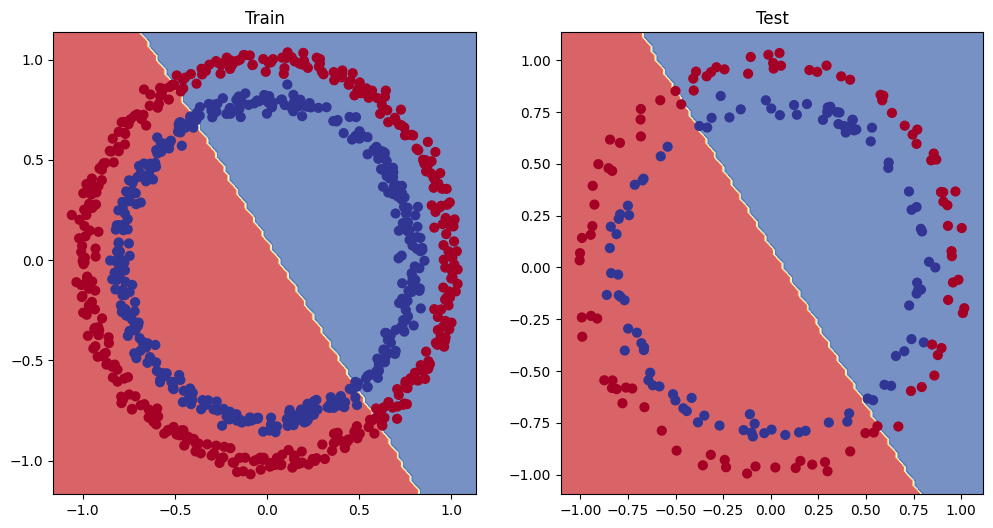

In [ ]:
# plot decision boundries with training and testing sets

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

# Improving a model (from a model prespective)

In [ ]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.hl_1 = nn.Linear(in_features = 2, out_features = 10)
        self.hl_2 = nn.Linear(in_features = 10, out_features = 10)
        self.outlayer = nn.Linear(in_features = 10, out_features = 1)

    def forward(self, x):
        return self.outlayer(self.hl_2(self.hl_1(x)))

In [ ]:
model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (hl_1): Linear(in_features=2, out_features=10, bias=True)
  (hl_2): Linear(in_features=10, out_features=10, bias=True)
  (outlayer): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_1.parameters(), lr = 0.1)

In [ ]:
torch.manual_seed(42)

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### Train ###
    model_1.train()

    train_logits = model_1(X_train).squeeze()
    train_pred = torch.round(torch.sigmoid(train_logits))

    train_loss = loss_fn(train_logits, y_train)
    train_acc = accuracy_fn(y_true = y_train,
                            y_pred = train_pred)

    optimizer.zero_grad()

    train_loss.backward()

    optimizer.step()

    ### Test ###
    model_1.eval()

    with torch.inference_mode():
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true = y_test,
                               y_pred = test_pred)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train Loss: {train_loss:.5f} | Train Accuracy: {train_acc:.2f} | Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}")

Epoch: 0 | Train Loss: 0.69396 | Train Accuracy: 50.88 | Test Loss: 0.69261 | Test Accuracy: 51.00
Epoch: 100 | Train Loss: 0.69305 | Train Accuracy: 50.38 | Test Loss: 0.69379 | Test Accuracy: 48.00
Epoch: 200 | Train Loss: 0.69299 | Train Accuracy: 51.12 | Test Loss: 0.69437 | Test Accuracy: 46.00
Epoch: 300 | Train Loss: 0.69298 | Train Accuracy: 51.62 | Test Loss: 0.69458 | Test Accuracy: 45.00
Epoch: 400 | Train Loss: 0.69298 | Train Accuracy: 51.12 | Test Loss: 0.69465 | Test Accuracy: 46.00
Epoch: 500 | Train Loss: 0.69298 | Train Accuracy: 51.00 | Test Loss: 0.69467 | Test Accuracy: 46.00
Epoch: 600 | Train Loss: 0.69298 | Train Accuracy: 51.00 | Test Loss: 0.69468 | Test Accuracy: 46.00
Epoch: 700 | Train Loss: 0.69298 | Train Accuracy: 51.00 | Test Loss: 0.69468 | Test Accuracy: 46.00
Epoch: 800 | Train Loss: 0.69298 | Train Accuracy: 51.00 | Test Loss: 0.69468 | Test Accuracy: 46.00
Epoch: 900 | Train Loss: 0.69298 | Train Accuracy: 51.00 | Test Loss: 0.69468 | Test Accuracy

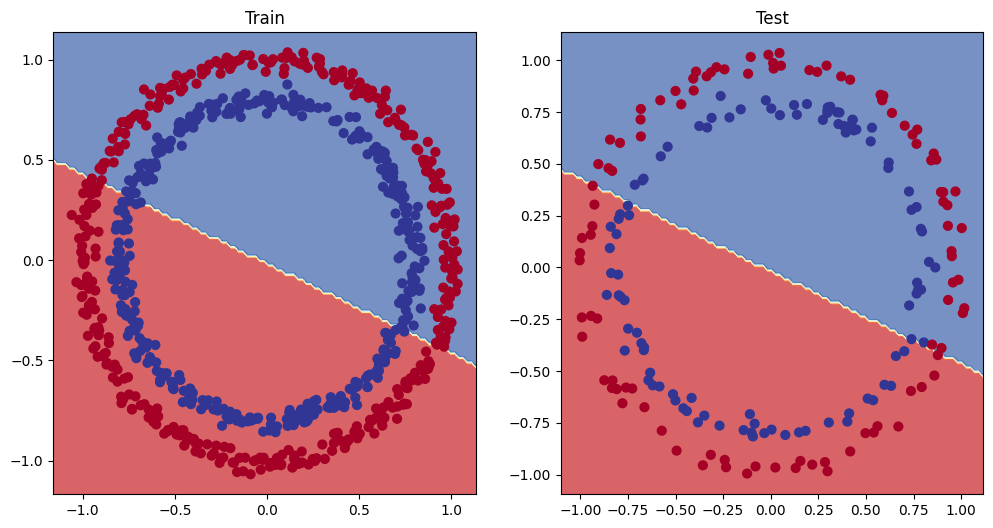

In [ ]:
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### Testing our model on a straight line data

In [ ]:
w, b = 0.7, 0.3

X_reg = torch.arange(0, 1, 0.01).unsqueeze(dim=1)
y_reg = w * X_reg + b

In [ ]:
print(len(X_reg))
X_reg[:5], y_reg[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
# split the data into train and test sets

train_split = int(0.8 * len(X_reg))
X_reg_train, y_reg_train = X_reg[:train_split], y_reg[:train_split]
X_reg_test, y_reg_test = X_reg[train_split:], y_reg[train_split:]

print(len(X_reg_train))
print(len(y_reg_train))
print(len(X_reg_test))
print(len(y_reg_test))

80
80
20
20


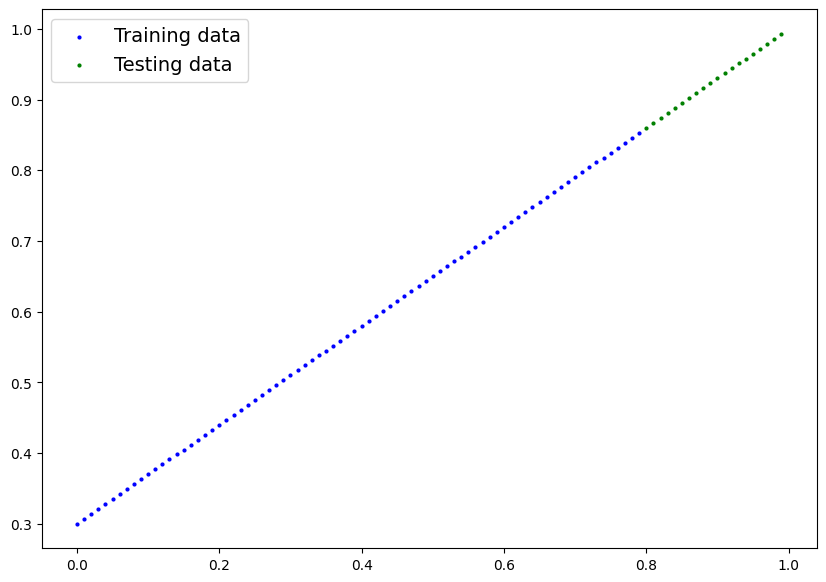

In [ ]:
plot_predictions(
    train_data = X_reg_train,
    train_labels = y_reg_train,
    test_data = X_reg_test,
    test_labels = y_reg_test
)

### Adjusting model_1 to fit a straight line

In [ ]:
# creating model_2 with the same architecture as model_1

model_2 = nn.Sequential(
    nn.Linear(in_features = 1, out_features = 10),
    nn.Linear(in_features = 10, out_features = 10),
    nn.Linear(in_features = 10, out_features = 1)
).to(device)

In [ ]:
model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_2.parameters(), lr = 0.1)

In [ ]:
def train_regression(epochs:int, model, train_data, train_labels, test_data, test_labels, loss_fn, optimizer):
    for epoch in range(epochs):
        ### Train ###
        model.train()

        train_pred = model(train_data)

        train_loss = loss_fn(train_pred, train_labels)

        optimizer.zero_grad()

        train_loss.backward()

        optimizer.step()

        ### Testing ###
        model.eval()
        with torch.inference_mode():
            test_pred = model(test_data)
            test_loss = loss_fn(test_pred, test_labels)

        if epoch % 100 == 0:
            print(f"Epoch: {epoch} | Train Loss: {train_loss:.5f} | Test Loss: {test_loss:0.5f}")

    # return train_pred, test_pred

In [ ]:
torch.manual_seed(42)

X_reg_train, y_reg_train = X_reg_train.to(device), y_reg_train.to(device)
X_reg_test, y_reg_test = X_reg_test.to(device), y_reg_test.to(device)

In [ ]:
train_regression(
    epochs = 1000,
    model = model_2,
    train_data = X_reg_train,
    train_labels = y_reg_train,
    test_data = X_reg_test,
    test_labels = y_reg_test,
    loss_fn = loss_fn,
    optimizer = optimizer
)

Epoch: 0 | Train Loss: 0.75986 | Test Loss: 0.54143
Epoch: 100 | Train Loss: 0.09309 | Test Loss: 0.02901
Epoch: 200 | Train Loss: 0.07376 | Test Loss: 0.02850
Epoch: 300 | Train Loss: 0.06745 | Test Loss: 0.00615
Epoch: 400 | Train Loss: 0.06107 | Test Loss: 0.02004
Epoch: 500 | Train Loss: 0.05698 | Test Loss: 0.01061
Epoch: 600 | Train Loss: 0.04857 | Test Loss: 0.01326
Epoch: 700 | Train Loss: 0.06109 | Test Loss: 0.02127
Epoch: 800 | Train Loss: 0.05600 | Test Loss: 0.01425
Epoch: 900 | Train Loss: 0.05571 | Test Loss: 0.00603


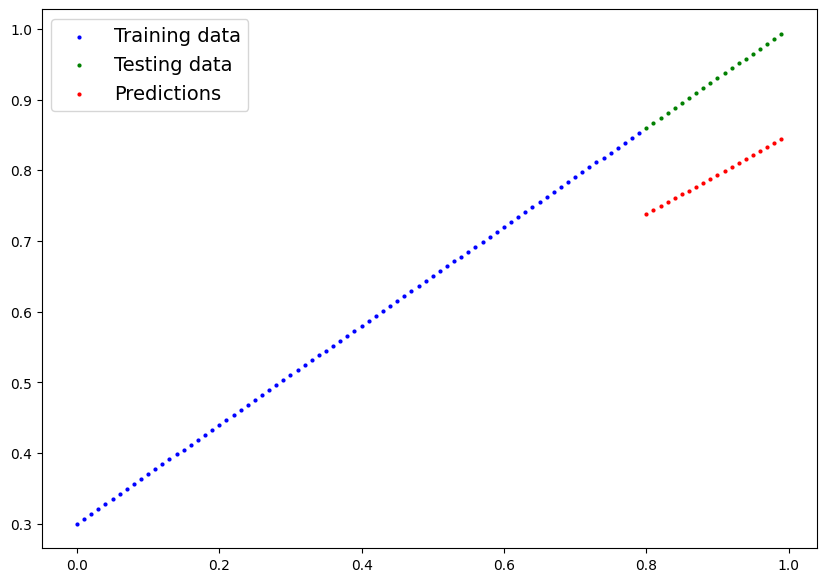

In [ ]:
model_2.eval()

with torch.inference_mode():
    infer = model_2(X_reg_test)

plot_predictions(
    train_data = X_reg_train.cpu(),
    train_labels = y_reg_train.cpu(),
    test_data = X_reg_test.cpu(),
    test_labels = y_reg_test.cpu(),
    predictions = infer.cpu()
)

# Non-linear Activation Function is the answer
Give the model the ability to create non-straight (non-linear) lines

### Recreating non-linear data (red-blue circles)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

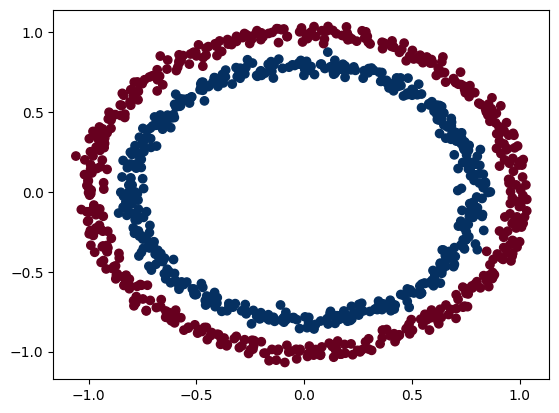

In [ ]:
X, y = make_circles(
    n_samples = 1000,
    noise = 0.03,
    random_state = 42
)

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdBu)

In [ ]:
import torch
from sklearn.model_selection import train_test_split

In [ ]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [ ]:
X_test[:2], y_test[:2]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600]]),
 tensor([1., 0.]))

### Building a model with non-linearity

In [ ]:
from torch import nn

In [ ]:
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.hl_1 = nn.Linear(in_features = 2, out_features = 10)
        self.hl_2 = nn.Linear(in_features = 10, out_features = 10)
        self.out = nn.Linear(in_features = 10, out_features = 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.out(self.relu(self.hl_2(self.relu(self.hl_1(x)))))

In [ ]:
model_3 = CircleModelV2().to(device)
print(model_3)

CircleModelV2(
  (hl_1): Linear(in_features=2, out_features=10, bias=True)
  (hl_2): Linear(in_features=10, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr = 0.1)

### Training a model with non-linearity

In [ ]:
torch.manual_seed(42)

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):

    ### Train ###
    model_3.train()

    train_logits = model_3(X_train).squeeze()
    train_pred = torch.round(torch.sigmoid(train_logits))

    train_loss = loss_fn(train_logits, y_train)
    train_acc = accuracy_fn(y_true = y_train,
                            y_pred = train_pred)

    optimizer.zero_grad()

    train_loss.backward()

    optimizer.step()

    ### Test ###
    model_3.eval()

    with torch.inference_mode():
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true = y_test,
                               y_pred = test_pred)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train Loss: {train_loss:.5f} | Train Accuracy: {train_acc:.2f} | Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}")

Epoch: 0 | Train Loss: 0.69295 | Train Accuracy: 50.00 | Test Loss: 0.69319 | Test Accuracy: 50.00
Epoch: 100 | Train Loss: 0.69115 | Train Accuracy: 52.88 | Test Loss: 0.69102 | Test Accuracy: 52.50
Epoch: 200 | Train Loss: 0.68977 | Train Accuracy: 53.37 | Test Loss: 0.68940 | Test Accuracy: 55.00
Epoch: 300 | Train Loss: 0.68795 | Train Accuracy: 53.00 | Test Loss: 0.68723 | Test Accuracy: 56.00
Epoch: 400 | Train Loss: 0.68517 | Train Accuracy: 52.75 | Test Loss: 0.68411 | Test Accuracy: 56.50
Epoch: 500 | Train Loss: 0.68102 | Train Accuracy: 52.75 | Test Loss: 0.67941 | Test Accuracy: 56.50
Epoch: 600 | Train Loss: 0.67515 | Train Accuracy: 54.50 | Test Loss: 0.67285 | Test Accuracy: 56.00
Epoch: 700 | Train Loss: 0.66659 | Train Accuracy: 58.38 | Test Loss: 0.66322 | Test Accuracy: 59.00
Epoch: 800 | Train Loss: 0.65160 | Train Accuracy: 64.00 | Test Loss: 0.64757 | Test Accuracy: 67.50
Epoch: 900 | Train Loss: 0.62362 | Train Accuracy: 74.00 | Test Loss: 0.62145 | Test Accuracy

### Evaluating the non-linear model

In [ ]:
model_3.eval()

with torch.inference_mode():
    infer_logits = model_3(X_test).squeeze()
    infer_preds = torch.round(torch.sigmoid(infer_logits))

infer_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

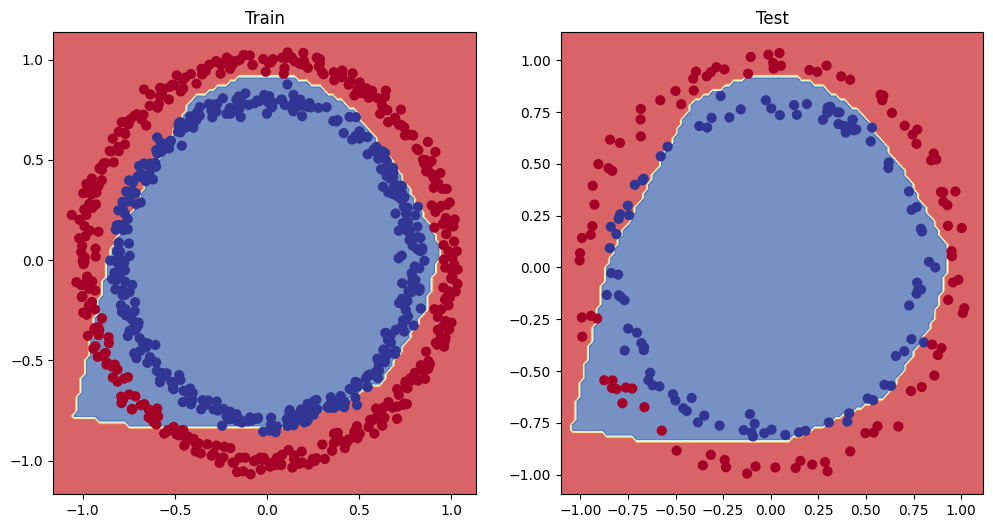

In [ ]:
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

# Replictating non-linear activation function

In [ ]:
A = torch.arange(-10, 10, 1, dtype = torch.float32)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

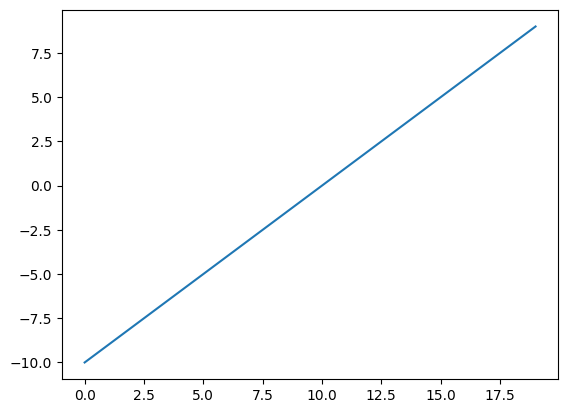

In [ ]:
plt.plot(A)

In [ ]:
# Create our own relu function

def relu(x):
    return torch.maximum(torch.tensor(0), x)

In [ ]:
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

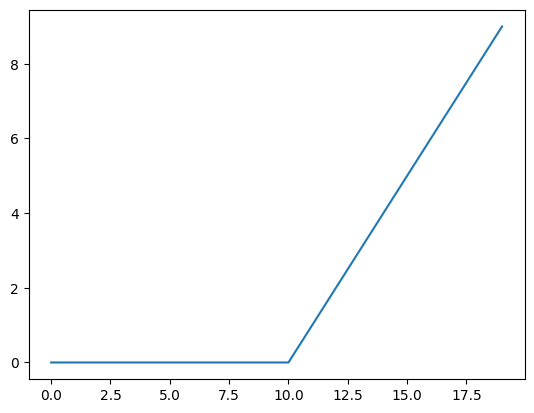

In [ ]:
plt.plot(relu(A))


Trying the sigmoid funciton: $$ S(x) = \frac{1}{1+e^{-x_i}} $$
- Converts raw values (logits) into probabilities.

In [ ]:
# Create our own sigmoid function

def sigmoid(x):
    return 1/(1+torch.exp(-x))

In [ ]:
sigmoid(A)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

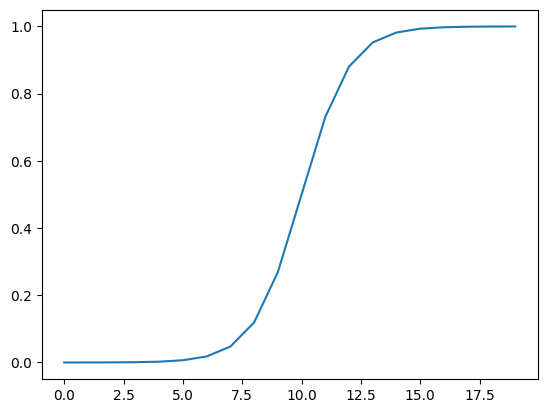

In [ ]:
plt.plot(sigmoid(A))

# Building a multi-class PyTorch model

### Creating a multi-class classification data

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [ ]:
NUM_FEATURES, NUM_CLASSES, RANDOM_SEED = 2, 4, 42

X_blob, y_blob = make_blobs(
    n_samples = 1000,
    n_features = NUM_FEATURES, # X features
    centers = NUM_CLASSES, # y labels
    cluster_std = 1.5,
    random_state = RANDOM_SEED
)

In [ ]:
# Turning data from numpy to tensors

X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

X_blob[:5], y_blob[:5]

(tensor([[-8.4134,  6.9352],
         [-5.7665, -6.4312],
         [-6.0421, -6.7661],
         [ 3.9508,  0.6984],
         [ 4.2505, -0.2815]]),
 tensor([3, 2, 2, 1, 1]))

In [ ]:
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(
    X_blob, y_blob,
    test_size = 0.2,
    random_state = 42
)

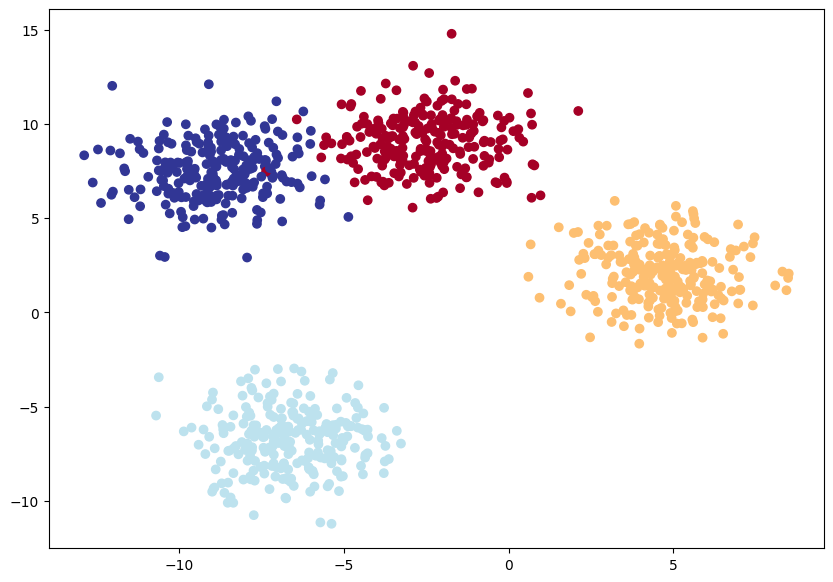

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c = y_blob, cmap = plt.cm.RdYlBu);

### Building the model

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
from torch import nn

In [ ]:
class BlobModel(nn.Module):
    def __init__(self, input_features:int, output_features:int, hidden_units:int = 8):
        """Inititalizes all required hyperparameters for a multi-class classification model.
        Args:
            input_features (int): Number of input features to the model.
            output_features (int): Number of output features (classes) of the model.
            hidden_units (int): Number of hidden units per layer (default is 8).
        """
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Linear(in_features = input_features, out_features = hidden_units),
            nn.ReLU(),
            nn.Linear(in_features = hidden_units, out_features = hidden_units),
            nn.ReLU(),
            nn.Linear(in_features = hidden_units, out_features = output_features)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [ ]:
model_4 = BlobModel(
    input_features = NUM_FEATURES,
    output_features = NUM_CLASSES,
    hidden_units = 8
).to(device)

In [ ]:
model_4

BlobModel(
  (layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

### Creating a loss function and optimizer

In [ ]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(
    model_4.parameters(),
    lr = 0.1
)

- logits

In [ ]:
model_4(X_blob_train.to(device))[:5]

tensor([[-0.7586, -0.6810, -1.5180, -1.1178],
        [-0.2398, -1.2335, -0.9858, -0.2899],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [ 0.2391, -0.2472,  0.1494,  0.0213],
        [-0.1214, -0.9804, -0.6918, -0.1923]], grad_fn=<SliceBackward0>)

In [ ]:
model_4(X_blob_train.to(device))[0].shape, NUM_CLASSES

(torch.Size([4]), 4)

- Our model makes a prediction for each class.
- We want to go from logits to prediction probabilities and from prediction probabilities to prediction labels.
- We use the softmax activation function. The softmax function creates a probabilistic distribution using the logits (all values sum to one).

In [ ]:
y_logits = model_4(X_blob_test.to(device))

# Apply softmax across dim 1 to get prediction probabilities per example
y_pred_probs = torch.softmax(y_logits, dim = 1)

In [ ]:
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]], grad_fn=<SliceBackward0>)
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]], grad_fn=<SliceBackward0>)


In [ ]:
for i in range(5):
    print(sum(y_pred_probs[i]))

tensor(1.0000, grad_fn=<AddBackward0>)
tensor(1.0000, grad_fn=<AddBackward0>)
tensor(1.0000, grad_fn=<AddBackward0>)
tensor(1.0000, grad_fn=<AddBackward0>)
tensor(1.0000, grad_fn=<AddBackward0>)


- The predictions sum to one meaning that it is a prob. distribution for each sample.
- The predictions now tells how much a sample maps to each class.
- The highest value is the value that the model thinks the sample belongs to.


In [ ]:
# check highest value
pred_class = torch.argmax(y_pred_probs[0])

print(y_pred_probs[0])
print(f"Index of the highes: {pred_class}")

tensor([0.3169, 0.3244, 0.1405, 0.2182], grad_fn=<SelectBackward0>)
Index of the highes: 1


- The model thinks that the fourth class is the right answer for the first example.
- This guessing have a low chance of being right since we did not train the model yet.

> Recap:
- Logits are the model's raw outputs.
- Use softmax to turn the logits into prediction probabilities if you have a multi-class problem.
- We consider the highest prediction probability value as the chosen class by the model.

### Creating a training and testing loop for our multi-class model
- The same steps repeat except that we turn the logits to prediction probabilities using the softmax activation function and then to prediction labels by taking the argmax of the output.


In [ ]:
torch.manual_seed(42)

epochs = 100

X_blob_train = X_blob_train.to(device)
X_blob_test = X_blob_test.to(device)
y_blob_train = y_blob_train.to(device)
y_blob_test = y_blob_test.to(device)

for epoch in range(epochs):
    ### Train ###
    model_4.train()

    train_logits = model_4(X_blob_train)
    train_pred_probs = torch.softmax(train_logits, dim=1)
    train_preds = train_pred_probs.argmax(dim=1)

    train_loss = loss_fn(train_logits, y_blob_train)
    train_acc = accuracy_fn(y_true = y_blob_train,
                            y_pred = train_preds)

    optimizer.zero_grad()

    train_loss.backward()

    optimizer.step()

    ### Test ###
    model_4.eval()

    with torch.inference_mode():
        test_logits = model_4(X_blob_test)
        test_pred_probs = torch.softmax(test_logits, dim=1)
        test_preds = test_pred_probs.argmax(dim=1)

        test_loss = loss_fn(test_logits, y_blob_test)
        test_acc = accuracy_fn(y_true = y_blob_test,
                               y_pred = test_preds)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Train Loss: {train_loss:.5f} | Train Accuracy: {train_acc:.2f}% | Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2}%")

Epoch: 0 | Train Loss: 1.15883 | Train Accuracy: 40.38% | Test Loss: 1.07554 | Test Accuracy: 4.8e+01%
Epoch: 10 | Train Loss: 0.64476 | Train Accuracy: 96.75% | Test Loss: 0.66069 | Test Accuracy: 9.8e+01%
Epoch: 20 | Train Loss: 0.42535 | Train Accuracy: 98.50% | Test Loss: 0.43074 | Test Accuracy: 1e+02%
Epoch: 30 | Train Loss: 0.25294 | Train Accuracy: 99.12% | Test Loss: 0.24508 | Test Accuracy: 1e+02%
Epoch: 40 | Train Loss: 0.11232 | Train Accuracy: 99.25% | Test Loss: 0.10229 | Test Accuracy: 1e+02%
Epoch: 50 | Train Loss: 0.06627 | Train Accuracy: 99.25% | Test Loss: 0.05848 | Test Accuracy: 1e+02%
Epoch: 60 | Train Loss: 0.05068 | Train Accuracy: 99.25% | Test Loss: 0.04293 | Test Accuracy: 1e+02%
Epoch: 70 | Train Loss: 0.04300 | Train Accuracy: 99.25% | Test Loss: 0.03491 | Test Accuracy: 1e+02%
Epoch: 80 | Train Loss: 0.03836 | Train Accuracy: 99.25% | Test Loss: 0.02988 | Test Accuracy: 1e+02%
Epoch: 90 | Train Loss: 0.03525 | Train Accuracy: 99.25% | Test Loss: 0.02663 |

### PyTorch multi-class model inference and evaluation

- From the training output, it seems that the model has an excellence performance.
- Let's visualize to make sure of that.

In [ ]:
model_4.eval()

with torch.inference_mode():
    infer_logits = model_4(X_blob_test)

infer_logits[:10]

tensor([[-0.6249,  5.9860, -7.6323, -8.4470],
        [-2.1738, -6.3750, -3.7202,  3.1203],
        [-3.4102, -3.8958,  3.1567, -2.6119],
        [-1.1505,  4.1962, -3.8472, -4.8820],
        [ 3.7548, -1.3391, -9.1422, -6.9466],
        [-2.8211, -7.5767, -4.2944,  3.7944],
        [-3.0306, -3.3328,  2.7955, -2.1374],
        [ 3.3761, -4.0375, -6.8987, -3.5503],
        [-4.3620, -4.9904,  3.8123, -3.3814],
        [ 3.5012, -3.0281, -7.5401, -4.7064]])

- We cannot evaluate this logits form. We have to transform them to the same form as y_blob_test.

In [ ]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

- The transformation process:
  1. convert the logits to prediction probabilities using the softmax.
  2. get the prediction label of each sample by taking the argmax of the softmax output.
- However, it is possible to skip step 1 and get the prediction label directly using the argmax on the logits.

In [ ]:
# torch.argmax(infer_logits, dim = 1)[:5]

infer_pred_probs = torch.softmax(infer_logits, dim = 1)
infer_preds = infer_pred_probs.argmax(dim = 1)

In [ ]:
# Comparison

print(infer_preds[:10])
print(y_blob_test[:10])

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])
tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])


In [ ]:
print(f"{accuracy_fn(y_true = y_blob_test, y_pred = infer_preds)}%")

99.5%


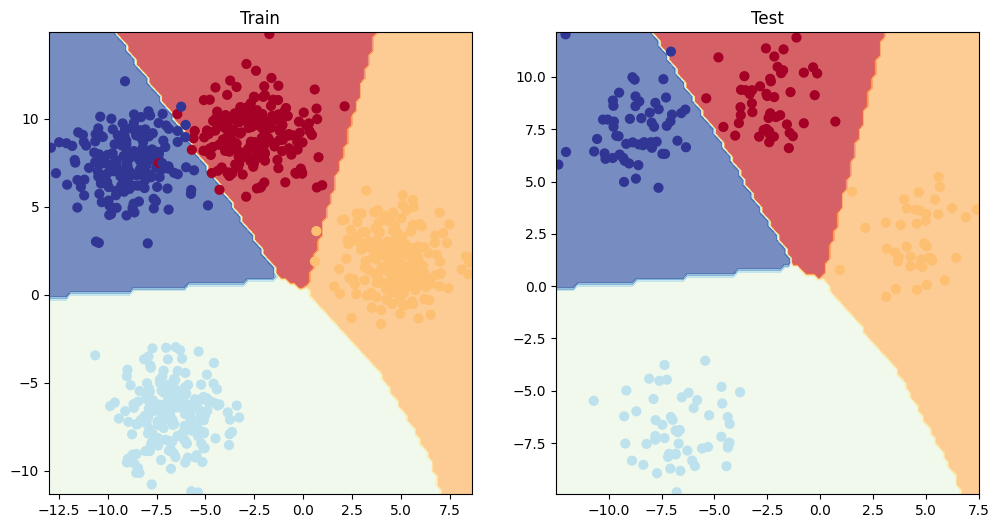

In [ ]:
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

# Evaluation metrics for classification problems

- We only covered these metrics to evaluate our models: loss, accuracy, and prediction visualization.

> Common Evaluation metrics (can be accessed through torch or sklearn library):
  - Accuracy: Percentage of labels the model predicted correctly.
  - Precision: an indicator of correct positive predictions.
    - Over all positive predictions, how many were correctly predicted as positive?
  - Recall: how often the model would correctly identify positive instances?
    - From all the positive samples, how many the model identified correctly?
  - F1-score: harmonic average between precision and recall.
  - Confusion Matrix: A tabular way to compare the true and false predictions.
  - Classification Report: A collection of the main metrics like the previous ones.

- The previous evaluation metrics can be found in TorchMetrics.

In [ ]:
# trying trochmetrics

try:
    from torchmetrics import Accuracy

except:
    !pip install torchmetrics==0.9.3
    from torchmetrics import Accuracy

In [ ]:
acc = Accuracy(task="multi-class", num_classes=4).to(device)
acc(infer_preds, y_blob_test)

tensor(0.9950)

# Exercises

In [ ]:
from sklearn.datasets import make_moons
import torch
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
# check for GPU

!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

### 1. A binary classification dataset

In [ ]:
features, labels = make_moons(n_samples = 1000, noise = 0.1, random_state = 42)

In [ ]:
type(features), type(labels)

(numpy.ndarray, numpy.ndarray)

In [ ]:
features, labels = torch.from_numpy(features).type(torch.float), torch.from_numpy(labels).type(torch.float)

In [ ]:
features.shape

torch.Size([1000, 2])

In [ ]:
labels.unique()

tensor([0., 1.])

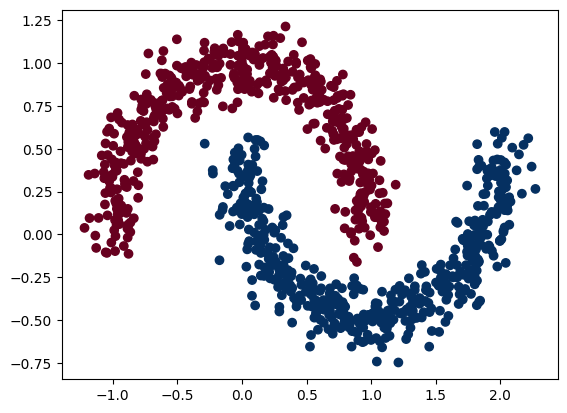

In [ ]:
# Visuatlize the data
plt.scatter(features[:,0], features[:,1], c=labels, cmap=plt.cm.RdBu);

In [ ]:
type(features), type(labels)

(torch.Tensor, torch.Tensor)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, train_size = 0.8, random_state = 42)
len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

### 2. Build a model

In [ ]:
from torch import nn

In [ ]:
class MoonModel(nn.Module):

    def __init__(self, in_features:int, out_features:int, hidden_units:int=10):
        super().__init__()
        self.layers_stack = nn.Sequential(
            nn.Linear(in_features = in_features, out_features = hidden_units),
            nn.ReLU(),
            nn.Linear(in_features = hidden_units, out_features = hidden_units),
            nn.ReLU(),
            nn.Linear(in_features = hidden_units, out_features = hidden_units),
            nn.ReLU(),
            nn.Linear(in_features = hidden_units, out_features = out_features)
        )

    def forward(self, x):
        return self.layers_stack(x)

In [ ]:
model_5 = MoonModel(2, 1).to(device)
model_5

MoonModel(
  (layers_stack): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=10, bias=True)
    (5): ReLU()
    (6): Linear(in_features=10, out_features=1, bias=True)
  )
)

In [ ]:
model_5.state_dict()

OrderedDict([('layers_stack.0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layers_stack.0.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layers_stack.2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  

### 3. Setup metrics and optimizer

In [ ]:
!pip -q install torchmetrics

In [ ]:
from torchmetrics import Accuracy

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()

acc_fn = Accuracy(multiclass=True, num_classes=2).to(device)

optimizer = torch.optim.SGD(model_5.parameters(), lr = 0.05)

### 4. Fit the model to the data

In [ ]:
torch.manual_seed(42)

epochs = 770

X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)

for epoch in range(epochs):
    ### Train ###
    model_5.train()

    train_logits = model_5(X_train).squeeze()
    train_pred = torch.round(torch.sigmoid(train_logits))

    train_loss = loss_fn(train_logits, y_train)
    train_acc = acc_fn(train_pred, y_train.type(torch.int))

    optimizer.zero_grad()

    train_loss.backward()

    optimizer.step()

    ### Test ###
    model_5.eval()

    with torch.inference_mode():
        test_logits = model_5(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits, y_test)
        test_acc = acc_fn(test_pred, y_test.type(torch.int))

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Train Loss: {train_loss:.5f} | Train Accuracy: {train_acc:.2f}% | Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Train Loss: 0.69809 | Train Accuracy: 0.50% | Test Loss: 0.69710 | Test Accuracy: 0.50%
Epoch: 10 | Train Loss: 0.69579 | Train Accuracy: 0.50% | Test Loss: 0.69490 | Test Accuracy: 0.50%
Epoch: 20 | Train Loss: 0.69384 | Train Accuracy: 0.50% | Test Loss: 0.69303 | Test Accuracy: 0.50%
Epoch: 30 | Train Loss: 0.69210 | Train Accuracy: 0.50% | Test Loss: 0.69137 | Test Accuracy: 0.50%
Epoch: 40 | Train Loss: 0.69047 | Train Accuracy: 0.50% | Test Loss: 0.68979 | Test Accuracy: 0.50%
Epoch: 50 | Train Loss: 0.68884 | Train Accuracy: 0.50% | Test Loss: 0.68823 | Test Accuracy: 0.50%
Epoch: 60 | Train Loss: 0.68714 | Train Accuracy: 0.50% | Test Loss: 0.68659 | Test Accuracy: 0.50%
Epoch: 70 | Train Loss: 0.68530 | Train Accuracy: 0.50% | Test Loss: 0.68482 | Test Accuracy: 0.50%
Epoch: 80 | Train Loss: 0.68325 | Train Accuracy: 0.50% | Test Loss: 0.68284 | Test Accuracy: 0.50%
Epoch: 90 | Train Loss: 0.68092 | Train Accuracy: 0.50% | Test Loss: 0.68060 | Test Accuracy: 0.50%
E

### 5. Inference

In [ ]:
torch.manual_seed(42)

model_5.eval()

with torch.inference_mode():
    infer_logits = model_5(X_test.to(device)).squeeze()
    infer_pred = torch.round(torch.sigmoid(infer_logits))

infer_pred[:5], y_test[:5]

(tensor([1., 0., 1., 0., 1.]), tensor([1., 0., 1., 0., 1.]))

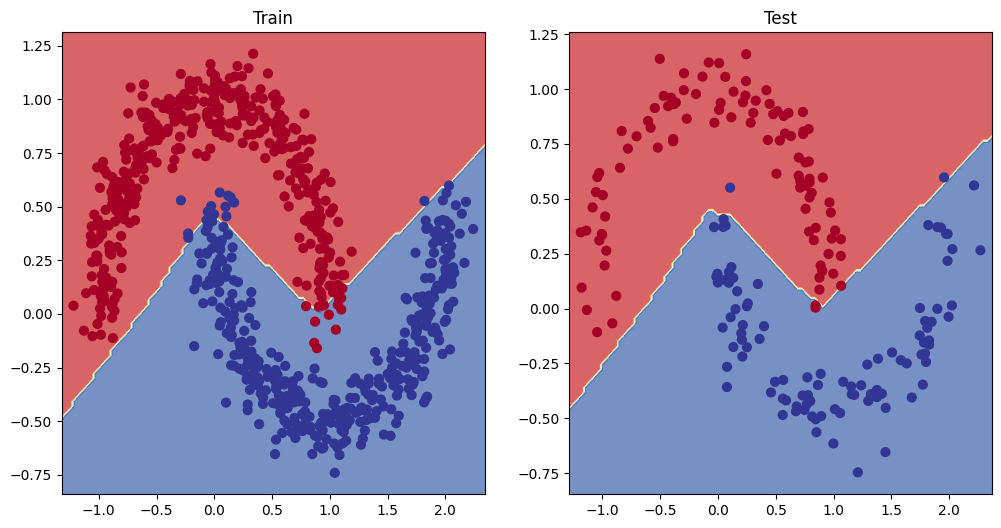

In [ ]:
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_5, X_train, y_train);
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_5, X_test, y_test);

### 6. Replication of Tanh activation function

In [ ]:
def tanh(z):
    return (torch.exp(z)-torch.exp(-z))/(torch.exp(z)+torch.exp(-z))

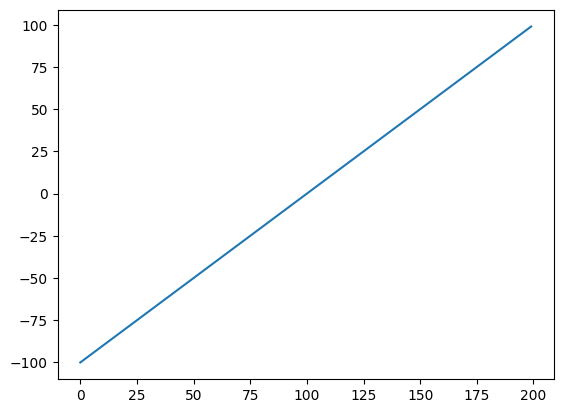

In [ ]:
A = torch.arange(-100, 100, 1)
plt.plot(A)

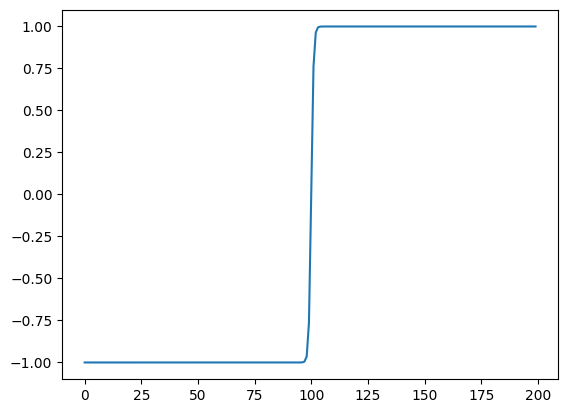

In [ ]:
plt.plot(torch.tanh(A))

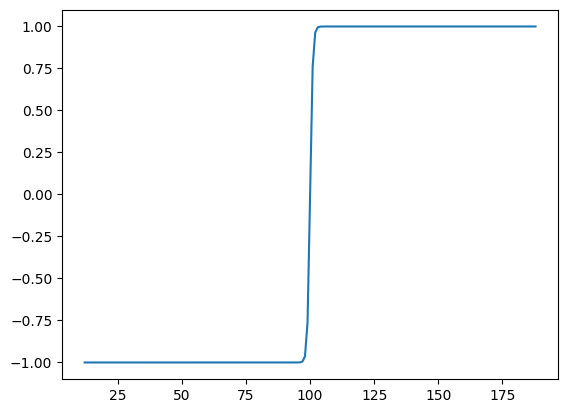

In [ ]:
plt.plot(tanh(A))

### 7. Multi-class model

- Creating a spiral dataset

In [ ]:
import numpy as np

In [ ]:
np.random.seed(42)

N = 100 # number of points per class
D = 2 # dimensionality of the input
K = 3 # number of classes

X = np.zeros((N*K, D))
y = np.zeros(N*K, dtype='uint8')

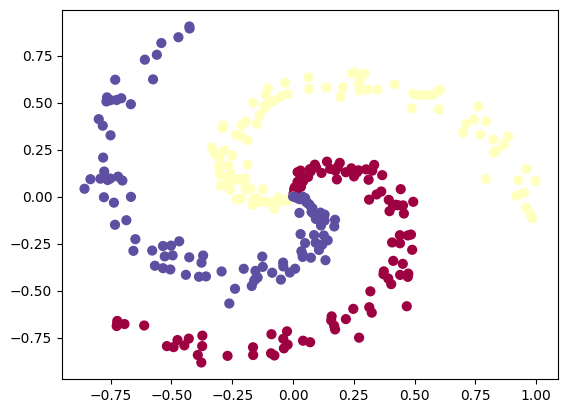

In [ ]:
for j in range(K):
    ix = range(N*j, N*(j+1))
    r = np.linspace(0.0, 1, N) # radius
    t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*0.2 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [ ]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.LongTensor)

- Split the data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
len(X_train), len(y_test), len(y_train), len(y_test)

(240, 60, 240, 60)

In [ ]:
device = "cuda" if torch.cuda.is_available() else 'cpu'

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

- Create model

In [ ]:
class SpiralModel(nn.Module):
    def __init__(self, in_dim:int, out_dim:int, hidden_units:int=5):
        super().__init__()
        self.layers_stack = nn.Sequential(
            nn.Linear(in_features=in_dim, out_features=hidden_units),
            nn.Tanh(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.Tanh(),
            nn.Linear(in_features=hidden_units, out_features=out_dim)
        )

    def forward(self, x):
        return self.layers_stack(x)

In [ ]:
num_classes = len(y.unique())
num_features = X.shape[1]

In [ ]:
model_6 = SpiralModel(num_features, num_classes).to(device)
model_6.state_dict()

OrderedDict([('layers_stack.0.weight',
              tensor([[ 0.0756, -0.1249],
                      [-0.2107,  0.4520],
                      [ 0.6077, -0.0700],
                      [-0.1583,  0.0103],
                      [-0.0422,  0.1700]])),
             ('layers_stack.0.bias',
              tensor([ 0.1982, -0.6422, -0.2609,  0.5955,  0.2755])),
             ('layers_stack.2.weight',
              tensor([[-0.0222, -0.2696, -0.2736, -0.4006, -0.1458],
                      [ 0.1510,  0.2852,  0.2065, -0.3953, -0.2689],
                      [-0.0706,  0.4326,  0.0647, -0.1158,  0.1850],
                      [-0.1703, -0.2895,  0.3264, -0.2033, -0.0897],
                      [-0.4449,  0.2993,  0.3388,  0.1630, -0.3118]])),
             ('layers_stack.2.bias',
              tensor([-0.4414, -0.3632,  0.3335,  0.2147,  0.3763])),
             ('layers_stack.4.weight',
              tensor([[ 0.2343,  0.1132, -0.0044, -0.3401, -0.3832],
                      [-0.4183,  0.1831

- Set metrics and optimizer

In [ ]:
!pip -q install torchmetrics

In [ ]:
from torchmetrics import Accuracy

In [ ]:
acc_fn = Accuracy(num_classes=num_classes, multiclass=True).to(device)

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model_6.parameters(), lr=0.07)

In [ ]:
epochs = 100

for epoch in range(epochs):
    ### Train ###
    model_6.train()

    train_logits = model_6(X_train)
    train_probs = torch.softmax(train_logits, dim=1)
    train_preds = train_probs.argmax(dim=1)

    train_loss = loss_fn(train_logits, y_train)
    train_acc = acc_fn(train_preds, y_train)

    optimizer.zero_grad()

    train_loss.backward()

    optimizer.step()

    ### Test ###
    model_6.eval()

    with torch.inference_mode():
        test_logits = model_6(X_test)
        test_probs = torch.softmax(test_logits, dim=1)
        test_preds = test_probs.argmax(dim=1)

        test_loss = loss_fn(test_logits, y_test)
        test_acc = acc_fn(test_preds, y_test)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Train Loss: {train_loss:.5f} | Train Accuracy:{train_acc:.2f} | Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}")

Epoch: 0 | Train Loss: 1.10838 | Train Accuracy:0.32 | Test Loss: 1.10216 | Test Accuracy: 0.27
Epoch: 10 | Train Loss: 0.76653 | Train Accuracy:0.51 | Test Loss: 0.79780 | Test Accuracy: 0.50
Epoch: 20 | Train Loss: 0.70395 | Train Accuracy:0.56 | Test Loss: 0.73018 | Test Accuracy: 0.50
Epoch: 30 | Train Loss: 0.60937 | Train Accuracy:0.67 | Test Loss: 0.62258 | Test Accuracy: 0.60
Epoch: 40 | Train Loss: 0.48045 | Train Accuracy:0.81 | Test Loss: 0.47735 | Test Accuracy: 0.90
Epoch: 50 | Train Loss: 0.34175 | Train Accuracy:0.88 | Test Loss: 0.30337 | Test Accuracy: 0.93
Epoch: 60 | Train Loss: 0.21236 | Train Accuracy:0.92 | Test Loss: 0.17520 | Test Accuracy: 0.93
Epoch: 70 | Train Loss: 0.14199 | Train Accuracy:0.96 | Test Loss: 0.10039 | Test Accuracy: 0.98
Epoch: 80 | Train Loss: 0.09651 | Train Accuracy:0.97 | Test Loss: 0.05764 | Test Accuracy: 1.00
Epoch: 90 | Train Loss: 0.07050 | Train Accuracy:0.98 | Test Loss: 0.03699 | Test Accuracy: 1.00


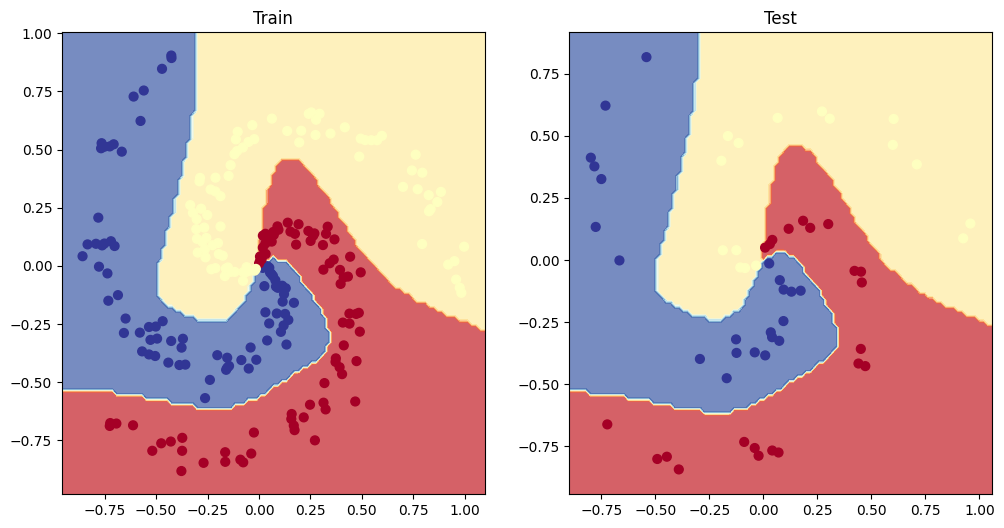

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_6, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_6, X_test, y_test)

# Extra-curriculum

- Three problems where machine classificatio is applicaple:
  1. Spam Detection
  2. Existing Disease
  3. Categorizing News